# Longitudinal Sections

This example demonstrates how longitudinal sections data read by PT3S can be accessed and used to create plots with Matplotlib.

# PT3S Release

In [1]:
#pip install PT3S -U --no-deps

# Imports

In [2]:
import os
import logging
import pandas as pd
import datetime
import numpy as np
import subprocess

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

import ipywidgets as widgets
from ipywidgets import interact

from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.palettes import Spectral10

from IPython.display import Image

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

In [3]:
import importlib

In [4]:
#importlib.reload(dxAndMxHelperFcts)

# Logging

In [5]:
logger = logging.getLogger()  

logFileName= r"Example3.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Read Model and Results

In [6]:
dbFilename="Example3"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [7]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True
                                ,maxRecords=-1
                                ,mxsVecsResults2MxDfVecAggs=[-1] # last timestep into AGSN
)
#NBVAL_IGNORE_OUTPUT

INFO    ; Dx.__init__: dbFile (abspath): c:\users\aUserName\3s\pt3s\Examples\Example3.db3 exists readable ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: 
+..\Examples\Example3.db3 is newer than
+..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MX1:
+SIR 3S' dbFile is newer than SIR 3S' mx1File
+in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; dxAndMxHelperFcts.readDxAndMx: running C:\\3S\Sir3s\SirCalc-90-14-02-10_Potsdam\SirCalc.exe ...
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\Examples\WDExample3\B1\V0\BZ1\M-1-0-1.1.MXS reading ...
INFO    ; dxWithMx.__init__: Example3: processing dx and mx ...


In [8]:
m.V3_AGSN.shape,m.dfAGSN.shape

((537, 58), (528, 10))

# Longitudinal Sections: V3_AGSN

In [9]:
m.V3_AGSN

,Pos,pk,tk,LFDNR,NAME,XL,compNr,nextNODE,OBJTYPE,OBJID,...,PH_n,T_n,H_n,RHO_n,mlc_n,"('STAT', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n","('TMIN', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n","('TMAX', 'mlc', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n","('TIME', 'mlc', Timestamp('2023-02-13 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n"
0,-1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-E0,ROHR,5691533564979419761,...,4.878388,90.0,5.024506,965.700012,592.984993,592.958713,592.962286,592.958738,602.48758,593.486796
0,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,4.800117,89.998016,5.024687,965.701172,592.958713,592.958713,592.962286,592.958738,602.48758,593.486796
1,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,4.731768,89.996399,5.024986,965.702148,592.937202,592.937202,592.941546,592.937253,602.419501,593.464211
2,2,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2163S,ROHR,5715081934973525403,...,4.698539,89.995605,5.025103,965.702637,592.926449,592.926449,592.931165,592.926512,602.385399,593.452897
3,3,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2043S,ROHR,5413647981880727734,...,4.629901,89.993744,5.025112,965.703735,592.901884,592.901884,592.907361,592.901971,602.306951,593.426847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,39,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2583S,ROHR,4621030304810285220,...,1.196312,59.871002,3.465572,983.764526,575.536089,575.536089,575.548996,575.537995,582.046941,575.916835
524,40,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2593S,ROHR,5046251450517706156,...,1.09261,59.890289,3.471704,983.754883,575.581644,575.581644,575.595171,575.583339,582.197052,575.969334
525,41,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2603S,ROHR,5478012163155701568,...,1.018315,59.908417,3.477824,983.745789,575.631904,575.631904,575.645893,575.633444,582.361158,576.026764
526,42,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2613S,ROHR,4968402990875758821,...,0.911956,59.904633,3.489146,983.747681,575.729795,575.729795,575.744475,575.731181,582.680754,576.138212


In [10]:
m.dfAGSN

,Pos,TYPE,ID,pk,tk,LFDNR,NAME,XL,compNr,nextNODE
0,0,ROHR,5691533564979419761,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S
1,1,ROHR,5048873293262650113,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S
2,2,ROHR,5715081934973525403,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2163S
3,3,ROHR,5413647981880727734,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2043S
4,4,ROHR,5134010500800575790,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K2033S
...,...,...,...,...,...,...,...,...,...,...
523,39,ROHR,4621030304810285220,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2583S
524,40,ROHR,5046251450517706156,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2593S
525,41,ROHR,5478012163155701568,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2603S
526,42,ROHR,4968402990875758821,4868980900521118307,4868980900521118307,3.0,"Längsschnitt in bar,B",2,1,R-K2613S


In [11]:
m.dfAGSN.columns.to_list()

['Pos', 'TYPE', 'ID', 'pk', 'tk', 'LFDNR', 'NAME', 'XL', 'compNr', 'nextNODE']

In [12]:
m.V3_AGSN.columns.to_list()

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 ('STAT',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TMIN',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TMAX',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-13 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 'QM',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT

# Section No. 1

In [13]:
dfAGSN=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==1)
]
colsAGSNBase=['LFDNR','XL','Pos']+['OBJTYPE'
                                   #,'OBJID'
                                   ,'DN'
                                   #,'Am2','Vm3'
                                   #,'NAME_CONT'
                                   ,'NAME_i','NAME_k']+['QM','direction']+['LSum']

dfAGSN[colsAGSNBase+['L','nextNODE','PH_n']]

,LFDNR,XL,Pos,OBJTYPE,DN,NAME_i,NAME_k,QM,direction,LSum,L,nextNODE,PH_n
88,1.0,1,-1,ROHR,350,V-E0,V-K1683S,287.090057,1,0.000000,0.000000,V-E0,4.878388
88,1.0,1,0,ROHR,350,V-E0,V-K1683S,287.090057,1,15.351701,15.351701,V-K1683S,4.800117
89,1.0,1,1,ROHR,350,V-K1683S,V-K1693S,287.090057,1,27.860648,12.508947,V-K1693S,4.731768
90,1.0,1,2,ROHR,350,V-K2163S,V-K1693S,-287.090057,-1,34.126153,6.265505,V-K2163S,4.698539
91,1.0,1,3,ROHR,350,V-K2043S,V-K2163S,-287.090057,-1,48.533695,14.407541,V-K2043S,4.629901
92,1.0,1,4,ROHR,350,V-K2033S,V-K2043S,-287.090057,-1,62.049538,13.515843,V-K2033S,4.579439
93,1.0,1,5,ROHR,350,V-K833S,V-K2033S,-287.090057,-1,79.324254,17.274715,V-K833S,4.538838
94,1.0,1,6,ROHR,350,V-K833S,V-K843S,287.090057,1,113.666420,34.342167,V-K843S,4.452928
95,1.0,1,7,ROHR,350,V-K843S,V-K853S,287.090057,1,149.752335,36.085915,V-K853S,4.400915
96,1.0,1,8,ROHR,350,V-K853S,V-K863S,287.090057,1,213.782486,64.030151,V-K863S,4.362684


In [14]:
dfAGSNRL=m.V3_AGSN[
    (m.V3_AGSN['LFDNR']==1)
    &
    (m.V3_AGSN['XL']==2)
]
dfAGSNRL[colsAGSNBase+['L','nextNODE','PH_n']]

,LFDNR,XL,Pos,OBJTYPE,DN,NAME_i,NAME_k,QM,direction,LSum,L,nextNODE,PH_n
132,1.0,2,-1,ROHR,350,R-E0,R-K4163S,-287.090057,-1,0.000000,0.000000,R-E0,3.025742
132,1.0,2,0,ROHR,350,R-E0,R-K4163S,-287.090057,-1,15.351701,15.351701,R-K4163S,2.953751
133,1.0,2,1,ROHR,350,R-K4163S,R-K4173S,-287.090057,-1,27.860648,12.508947,R-K4173S,2.885188
134,1.0,2,2,ROHR,350,R-K4643S,R-K4173S,287.090057,1,34.126153,6.265505,R-K4643S,2.851391
135,1.0,2,3,ROHR,350,R-K4523S,R-K4643S,287.090057,1,48.533695,14.407541,R-K4523S,2.77346
136,1.0,2,4,ROHR,350,R-K4513S,R-K4523S,287.090057,1,62.049538,13.515843,R-K4513S,2.729196
137,1.0,2,5,ROHR,350,R-K3313S,R-K4513S,287.090057,1,79.324254,17.274715,R-K3313S,2.707725
138,1.0,2,6,ROHR,350,R-K3313S,R-K3323S,-287.090057,-1,113.666420,34.342167,R-K3323S,2.629017
139,1.0,2,7,ROHR,350,R-K3323S,R-K3333S,-287.090057,-1,149.752335,36.085915,R-K3333S,2.580512
140,1.0,2,8,ROHR,350,R-K3333S,R-K3343S,-287.090057,-1,213.782486,64.030151,R-K3343S,2.551792


# Plot

## Define Axes

In [15]:
def fyPH(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('PH Druck in bar')
    ax.set_ylim(0,6)
    ax.set_yticks(sorted(np.append(np.linspace(0,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fymlc(ax,offset=60):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('mlc Druckhöhe in mlc')
    ax.set_ylim(545,605)
    ax.set_yticks(sorted(np.append(np.linspace(545,605,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fybarBzg(ax,offset=120):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('H Druck in barBzg')
    ax.set_ylim(0,6)
    ax.set_yticks(sorted(np.append(np.linspace(0,6,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyM(ax,offset=180):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('QM Massenstrom in t/h')
    ax.set_ylim(0,600)
    ax.set_yticks(sorted(np.append(np.linspace(0,600,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyT(ax,offset=240):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('T Tempertatur in °C')
    ax.set_ylim(55,115)
    ax.set_yticks(sorted(np.append(np.linspace(55,115,11),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
 

## Plotfunction

In [16]:
def plot(dfAGSN=pd.DataFrame()
        ,dfAGSNRL=pd.DataFrame()
        ,PHCol='PH_n'
        ,mlcCol='mlc_n'
        ,zKoorCol='ZKOR_n'
        ,barBzgCol='H_n'
        ,QMCol='QM'
        ,TCol='T_n'
        ,xCol='LSum'
        
):
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 10, 21))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()
    
    lns=[]

    #PH
    if PHCol != None:
        ax1 = ax0.twinx()     
        fyPH(ax1) 
        PH_SL=ax1.plot(dfAGSN[xCol], dfAGSN[PHCol], color='red', label=PHCol+' SL',ls='dotted')
        PH_RL=ax1.plot(dfAGSNRL[xCol], dfAGSNRL[PHCol], color='blue', label=PHCol+' RL',ls='dotted')
        lns.append(PH_SL[0])
        lns.append(PH_RL[0])
    
    #mlc
    ax11 = ax0.twinx()     
    fymlc(ax11) 
    mlc_SL=ax11.plot(dfAGSN[xCol], dfAGSN[mlcCol], color='red', label=mlcCol+' SL')
    mlc_RL=ax11.plot(dfAGSNRL[xCol], dfAGSNRL[mlcCol], color='blue', label=mlcCol+' RL')
    lns.append(mlc_SL[0])
    lns.append(mlc_RL[0])
    
    z=ax11.plot(dfAGSN[xCol], dfAGSN[zKoorCol], color='black', label=zKoorCol,ls='dashed',alpha=.5)
    lns.append(z[0])
    #print(type(z[0]))
    
    #barBZG
    if barBzgCol != None:
        ax12 = ax0.twinx()     
        fybarBzg(ax12) 
        barB_SL=ax12.plot(dfAGSN[xCol], dfAGSN[barBzgCol], color='red', label=barBzgCol+' SL',ls='dashdot')
        barB_RL=ax12.plot(dfAGSNRL[xCol], dfAGSNRL[barBzgCol], color='blue', label=barBzgCol+' RL',ls='dashdot')
        lns.append(barB_SL[0])
        lns.append(barB_RL[0])
        
    
    #M
    if QMCol != None:
        ax2 = ax0.twinx()     
        fyM(ax2)
        QM_SL=ax2.step(dfAGSN[xCol], dfAGSN[QMCol]*dfAGSN['direction'], color='orange', label=QMCol+' SL')
        QM_RL=ax2.step(dfAGSNRL[xCol], dfAGSNRL[QMCol]*dfAGSNRL['direction'], color='cyan', label=QMCol+' RL',ls='--')
        lns.append(QM_SL[0])
        lns.append(QM_RL[0])        
    
    #T
    if TCol != None:
        ax3 = ax0.twinx() 
        fyT(ax3)
        T_SL=ax3.plot(dfAGSN[xCol], dfAGSN[TCol], color='pink', label=TCol+' SL')
        T_RL=ax3.plot(dfAGSNRL[xCol], dfAGSNRL[TCol], color='lavender', label=TCol+' RL')
        lns.append(T_SL[0])
        lns.append(T_RL[0])   
    
    ax0.set_title('Longitudinal Section for '+dbFilename+f' - Number Of X-Points: {len(dfAGSN[xCol])}')

    labs = [l.get_label() for l in lns]
    ax0.legend(lns, labs)#, loc=0)
    
    plt.show()

## Plot

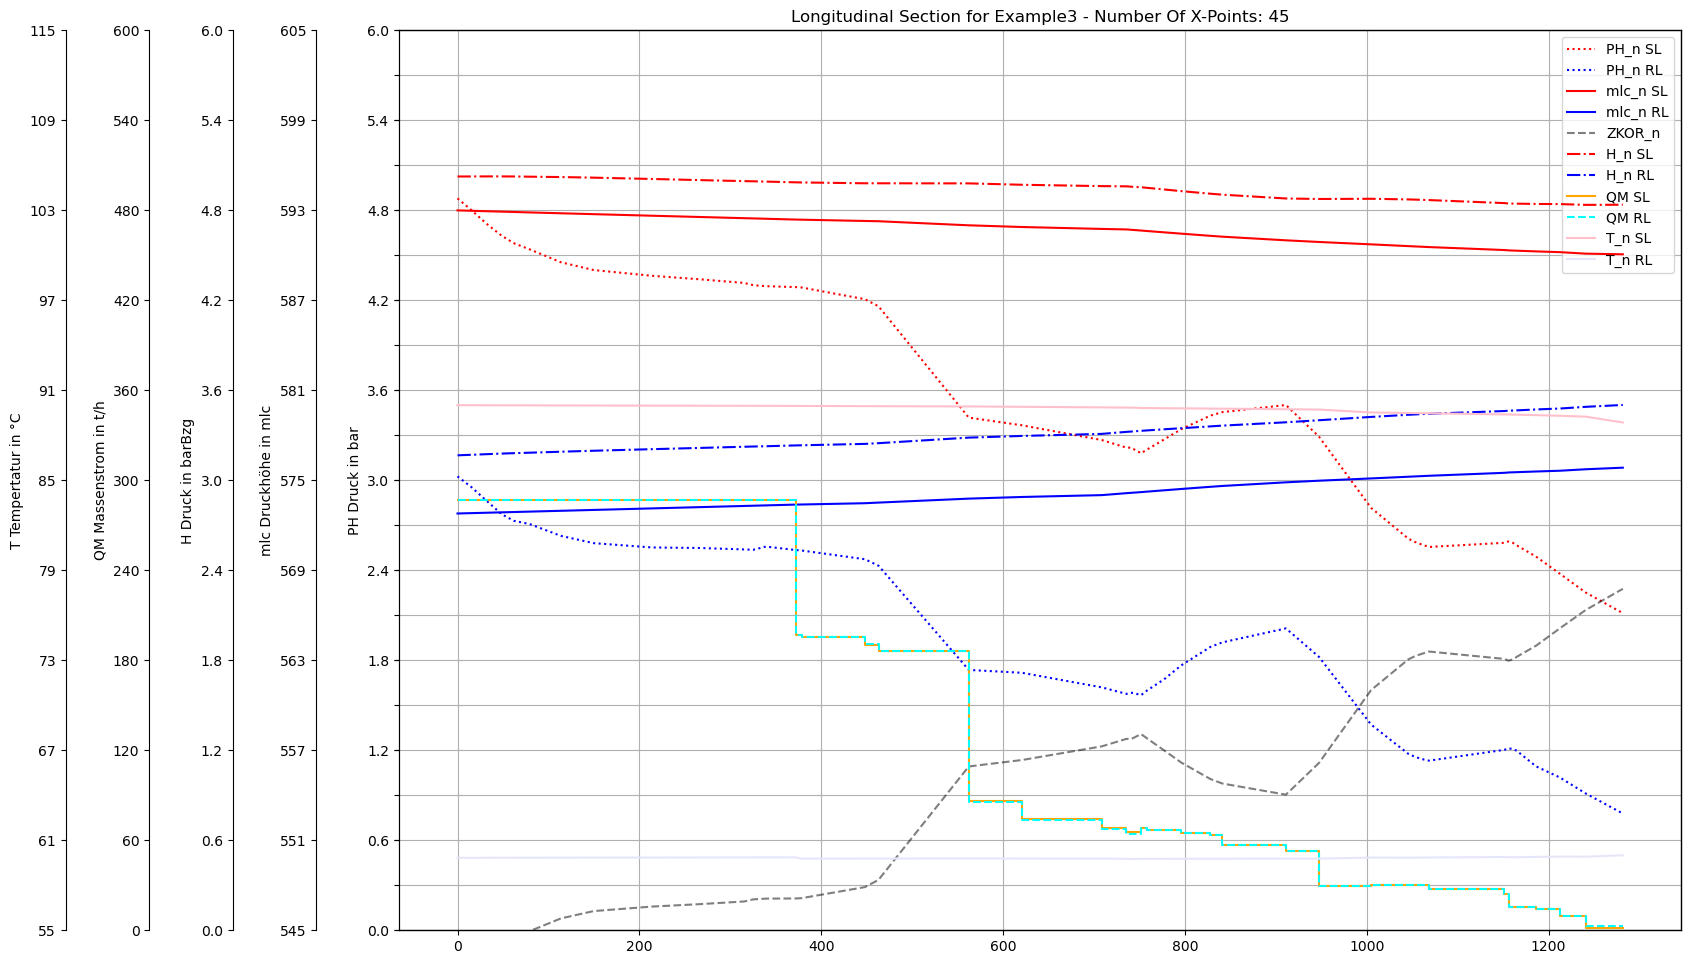

In [17]:
plot(dfAGSN,dfAGSNRL)

# V3_AGSN: Columns

In [18]:
m.V3_AGSN.columns.to_list()
#NBVAL_IGNORE_OUTPUT

['Pos',
 'pk',
 'tk',
 'LFDNR',
 'NAME',
 'XL',
 'compNr',
 'nextNODE',
 'OBJTYPE',
 'OBJID',
 'L',
 'DN',
 'Am2',
 'Vm3',
 'NAME_CONT',
 'NAME_i',
 'NAME_k',
 'ZKOR_n',
 'BESCHREIBUNG_n',
 'KVR_n',
 'LSum',
 'direction',
 ('STAT',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-12 23:00:00')),
 ('TMIN',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TMAX',
  'QM',
  Timestamp('2023-02-12 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 ('TIME',
  'QM',
  Timestamp('2023-02-13 23:00:00'),
  Timestamp('2023-02-13 23:00:00')),
 'QM',
 "('STAT', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TIME', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-12 23:00:00'))_n",
 "('TMIN', 'KNOT~*~*~*~PH', Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00'))_n",
 "('TMAX', 'KNOT

# V3_ROHRVEC (pipe interior points): Columns

In [19]:
#m.V3_ROHRVEC.columns.to_list()
#NBVAL_IGNORE_OUTPUT

In [20]:
m.V3_AGSN.shape,m.V3_ROHRVEC.shape

((537, 58), (2518, 342))

# V3_AGSNVEC: Longitudinal Sections with pipe interior points

In [21]:
m.V3_AGSNVEC.head()
#NBVAL_IGNORE_OUTPUT

,Pos,pk,tk,LFDNR,NAME,XL,compNr,nextNODE,OBJTYPE,OBJID,...,PH_n_end,mlc_n_min,mlc_n_max,mlc_n_end,H_n_min,H_n_max,H_n_end,QM_min,QM_max,QM_end
0,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-E0,ROHR,5691533564979419761,...,4.928555,592.985013,602.571157,593.514544,5.019544,5.927689,5.069709,287.090085,538.206592,305.78714
1,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,4.889350,592.971923,602.529388,593.500700,5.018306,5.923736,5.068401,287.090085,538.206592,305.78714
2,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,4.850145,592.958713,602.487610,593.486796,5.017056,5.919782,5.067087,287.090085,538.206592,305.78714
3,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,4.815920,592.947996,602.453601,593.475541,5.016042,5.916563,5.066023,287.090085,538.206592,305.78714
4,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,4.781695,592.937273,602.419526,593.464221,5.015028,5.913338,5.064953,287.090085,538.206592,305.78714


# V3_AGSNVEC's columns from Multiindex-Perspective

In [22]:
mIdx=pd.MultiIndex.from_tuples(
                [dxAndMxHelperFcts.fGetMultiindexTupleFromV3Col(col) for col in m.V3_AGSNVEC.columns.to_list()]
                ,names=['AColName','ResultChannels','Time1','Time2'])   

In [23]:
sorted([col for col in list(set(mIdx.get_level_values(level='AColName').to_list())) if not pd.isnull(col)])

['ASOLL',
 'Am2',
 'Am2_ROHRVEC',
 'BAUJAHR',
 'BESCHREIBUNG',
 'BESCHREIBUNG_n',
 'BZ',
 'Basis',
 'DA',
 'DELETED',
 'DELETED_CONT',
 'DI',
 'DN',
 'DN_ROHRVEC',
 'Erstellt',
 'FONT_CONT',
 'GEOM',
 'GEOMWKB',
 'GEOM_CONT',
 'GRAF',
 'GRAF_CONT',
 'Geaendert',
 'HAL',
 'IDPARENT_CONT',
 'IDREFERENZ',
 'IDREFERENZ_CONT',
 'ID_CONT',
 'IMPTNZ',
 'INDSCHALL',
 'IPLANUNG',
 'IRTRENN',
 'IptIdx',
 'IptIdxAsNo',
 'JLAMBS',
 'JVAbs',
 'KANTENZV',
 'KENNUNG',
 'KT',
 'KVR',
 'KVR_n',
 'L',
 'LAMBDA0',
 'LECKEND',
 'LECKMENGE',
 'LECKORT',
 'LECKSTART',
 'LECKSTATUS',
 'LFDNR',
 'LFDNR_CONT',
 'LSum',
 'LZU',
 'L_ROHRVEC',
 'MId',
 'MT',
 'MText',
 'MZ',
 'NAME',
 'NAME_CONT',
 'NAME_CONT_ROHRVEC',
 'NAME_DTRO',
 'NAME_LTGR',
 'NAME_STRASSE',
 'NAME_i',
 'NAME_i_ROHRVEC',
 'NAME_k',
 'NAME_k_ROHRVEC',
 'OBJID',
 'OBJTYPE',
 'PHRAbs',
 'PN',
 'Pos',
 'QMAVAbs',
 'QSVB',
 'RAU',
 'S',
 'SELECT1',
 'SELECT1_CONT',
 'STAT',
 'SVEC',
 'TIME',
 'TMAX',
 'TMIN',
 'T_n_end',
 'T_n_max',
 'T_n_min',
 

In [24]:
sorted([col for col in list(set(mIdx.get_level_values(level='ResultChannels').to_list())) if not pd.isnull(col)])

['H_n',
 'H_n_end',
 'H_n_max',
 'H_n_min',
 'KNOT~*~*~*~H_i',
 'KNOT~*~*~*~H_k',
 'KNOT~*~*~*~H_n',
 'KNOT~*~*~*~PH_i',
 'KNOT~*~*~*~PH_k',
 'KNOT~*~*~*~PH_n',
 'KNOT~*~*~*~RHO_i',
 'KNOT~*~*~*~RHO_k',
 'KNOT~*~*~*~RHO_n',
 'KNOT~*~*~*~T_i',
 'KNOT~*~*~*~T_k',
 'KNOT~*~*~*~T_n',
 'PH_n',
 'PH_n_end',
 'PH_n_max',
 'PH_n_min',
 'QM',
 'QMVEC',
 'QM_end',
 'QM_max',
 'QM_min',
 'RHO_n',
 'ROHR~*~*~*~A',
 'ROHR~*~*~*~DTTR',
 'ROHR~*~*~*~DWVERL',
 'ROHR~*~*~*~DWVERLABS',
 'ROHR~*~*~*~IAKTIV',
 'ROHR~*~*~*~IRTRENN',
 'ROHR~*~*~*~JV',
 'ROHR~*~*~*~MVEC',
 'ROHR~*~*~*~PDAMPF',
 'ROHR~*~*~*~PHR',
 'ROHR~*~*~*~PMIN',
 'ROHR~*~*~*~PVEC',
 'ROHR~*~*~*~PVECMAX_INST',
 'ROHR~*~*~*~PVECMIN_INST',
 'ROHR~*~*~*~QMAV',
 'ROHR~*~*~*~QMI',
 'ROHR~*~*~*~QMK',
 'ROHR~*~*~*~RHOI',
 'ROHR~*~*~*~RHOK',
 'ROHR~*~*~*~RHOVEC',
 'ROHR~*~*~*~TI',
 'ROHR~*~*~*~TK',
 'ROHR~*~*~*~TTRVEC',
 'ROHR~*~*~*~TVEC',
 'ROHR~*~*~*~VAV',
 'ROHR~*~*~*~VI',
 'ROHR~*~*~*~VK',
 'ROHR~*~*~*~VOLDA',
 'ROHR~*~*~*~WVL',
 'T_n',
 'barB

In [25]:
sorted([col for col in list(set(mIdx.get_level_values(level='Time1').to_list())) if not pd.isnull(col)])

[Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00')]

In [26]:
sorted([col for col in list(set(mIdx.get_level_values(level='Time2').to_list())) if not pd.isnull(col)])

[Timestamp('2023-02-12 23:00:00'), Timestamp('2023-02-13 23:00:00')]

In [27]:
columnsOld=m.V3_AGSNVEC.columns

# Usage of V3_AGSNVEC

In [28]:
m.V3_AGSNVEC.head()
#NBVAL_IGNORE_OUTPUT

,Pos,pk,tk,LFDNR,NAME,XL,compNr,nextNODE,OBJTYPE,OBJID,...,PH_n_end,mlc_n_min,mlc_n_max,mlc_n_end,H_n_min,H_n_max,H_n_end,QM_min,QM_max,QM_end
0,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-E0,ROHR,5691533564979419761,...,4.928555,592.985013,602.571157,593.514544,5.019544,5.927689,5.069709,287.090085,538.206592,305.78714
1,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,4.889350,592.971923,602.529388,593.500700,5.018306,5.923736,5.068401,287.090085,538.206592,305.78714
2,0,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1683S,ROHR,5691533564979419761,...,4.850145,592.958713,602.487610,593.486796,5.017056,5.919782,5.067087,287.090085,538.206592,305.78714
3,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,4.815920,592.947996,602.453601,593.475541,5.016042,5.916563,5.066023,287.090085,538.206592,305.78714
4,1,5755933101669454049,5755933101669454049,1.0,Längsschnitt,0,1,V-K1693S,ROHR,5048873293262650113,...,4.781695,592.937273,602.419526,593.464221,5.015028,5.913338,5.064953,287.090085,538.206592,305.78714


## Section No. 1

In [29]:
dfAGSNVec=m.V3_AGSNVEC[
    (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==1)
]


In [30]:
dfAGSNVecRL=m.V3_AGSNVEC[
 (m.V3_AGSNVEC['LFDNR']==1)
    &
    (m.V3_AGSNVEC['XL']==2)
]

## Plot

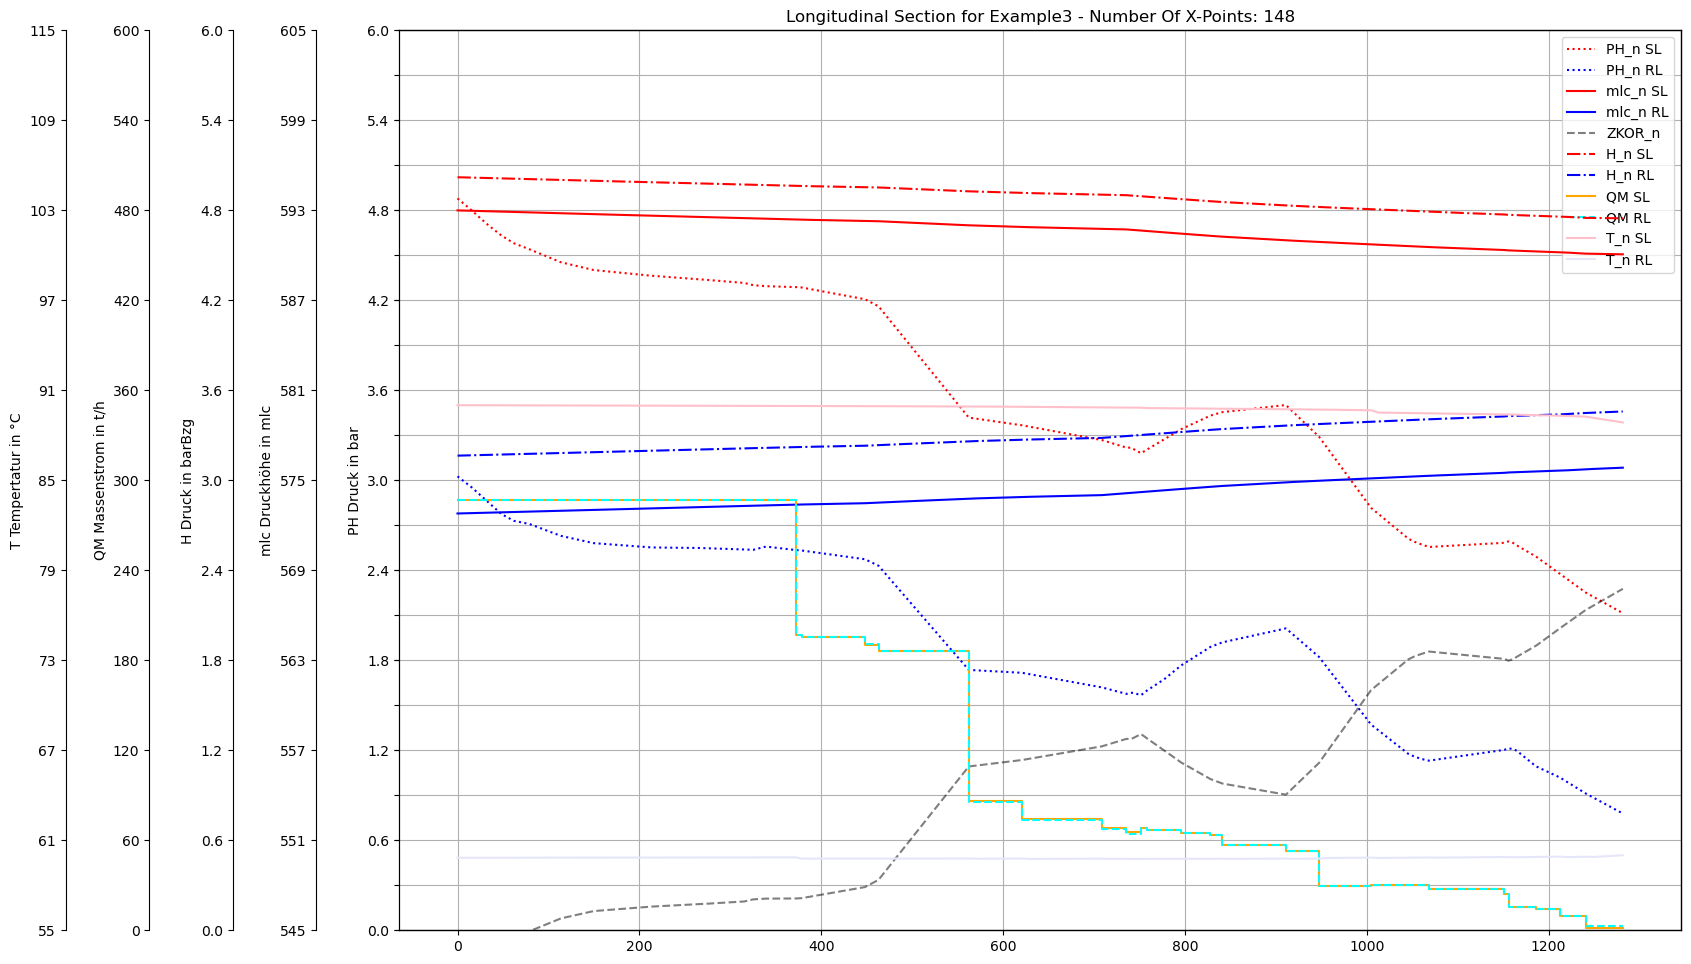

In [31]:
plot(dfAGSNVec,dfAGSNVecRL)

## Plot (max lines)

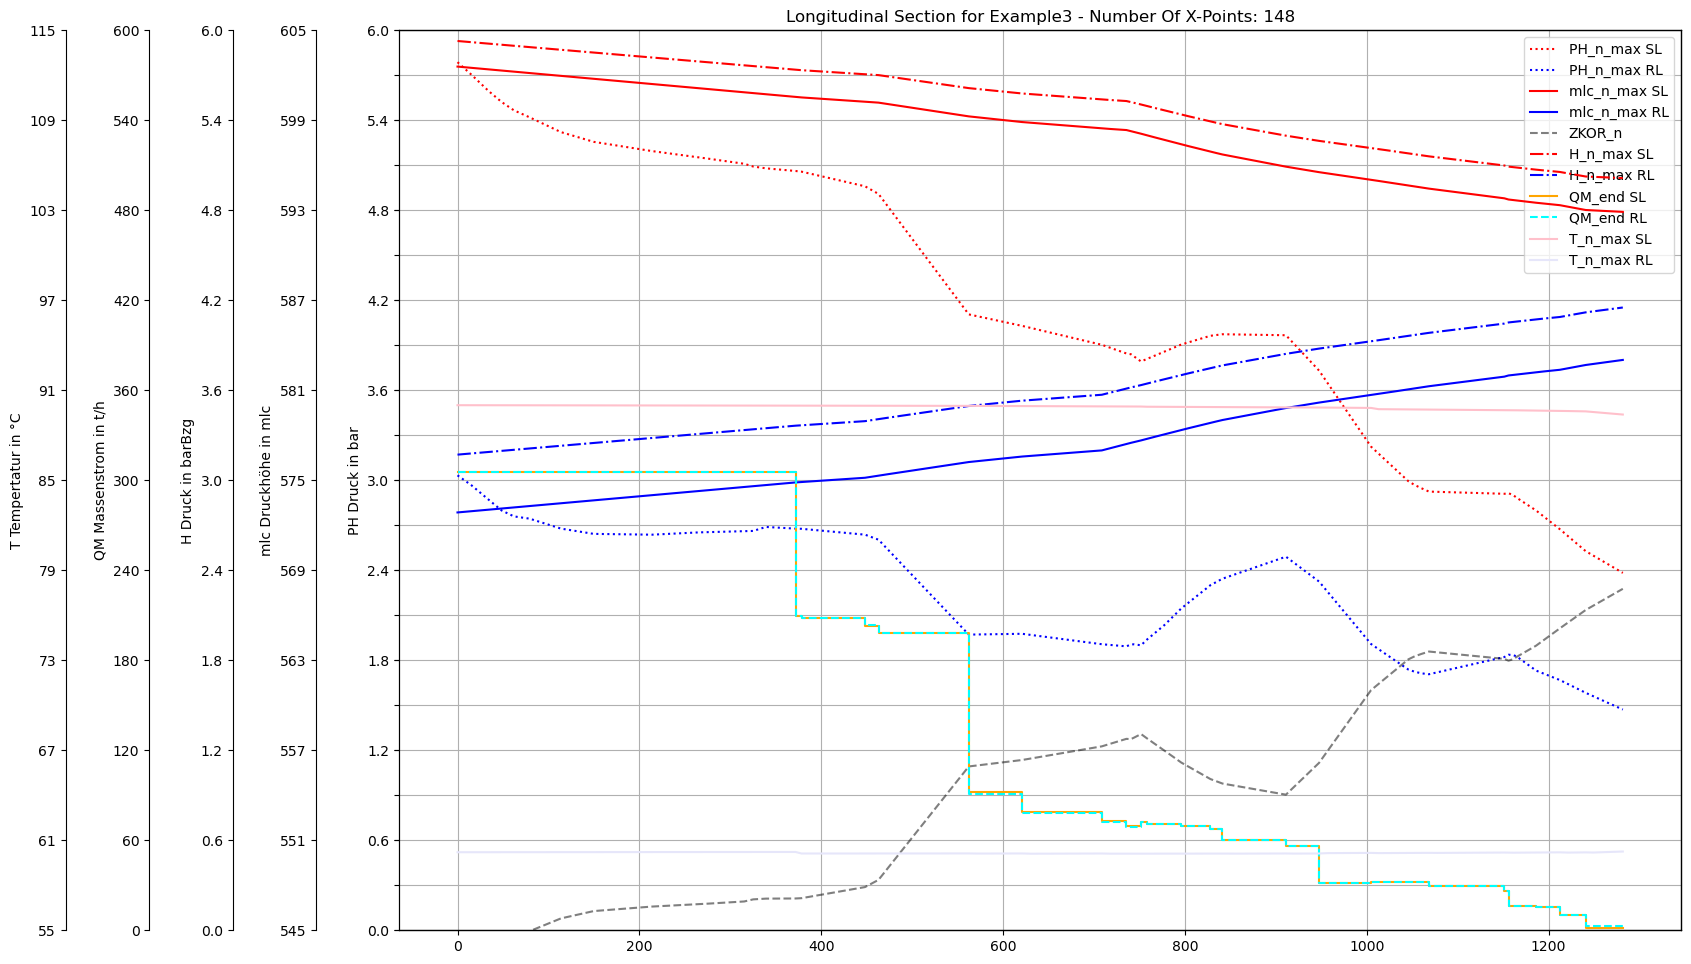

In [32]:
plot(dfAGSNVec,dfAGSNVecRL
        ,PHCol='PH_n_max'
        ,mlcCol='mlc_n_max'
        ,barBzgCol='H_n_max'
        ,QMCol='QM_end'
        ,TCol='T_n_max'
    )